# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.

### Instructions

#### 1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

#### 2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.

In [18]:
def split_numericals(data, threshold=100):
    num = data.select_dtypes(np.number)
    cont_columns = []
    disc_columns = []
    for col in num.columns:
        if len(num[col].unique()) > threshold:
            cont_columns.append(col)
        else:
            disc_columns.append(col)
    continuous_df = data.loc[:, cont_columns]
    discrete_df = data.loc[:, disc_columns]
    return continuous_df, discrete_df

In [19]:
continuous_df, discrete_df = split_numericals(data)

#### 3. Plot a correlation matrix, what can you see?

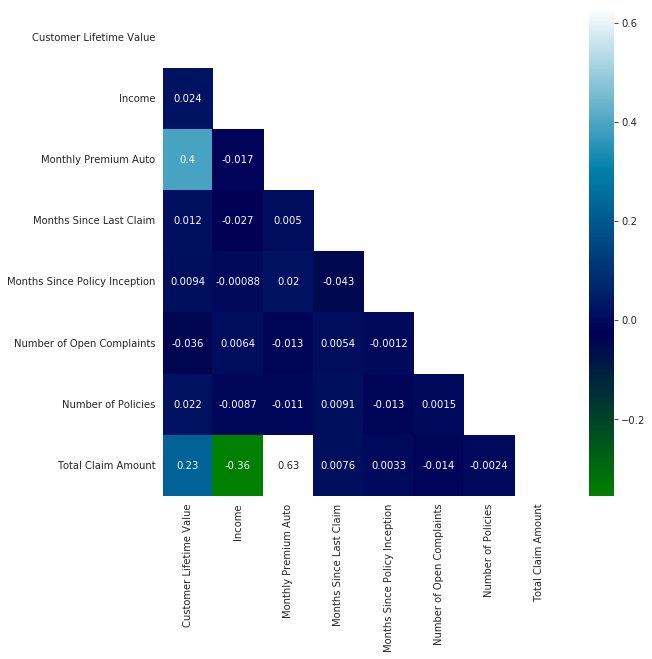

In [115]:
data_corr = data.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(data_corr, mask=mask, annot=True, cmap='ocean')
plt.show()

The monthly premium auto, income, and customer lifetime value are the most correlated features with the target variable (total claim amount).

#### 4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

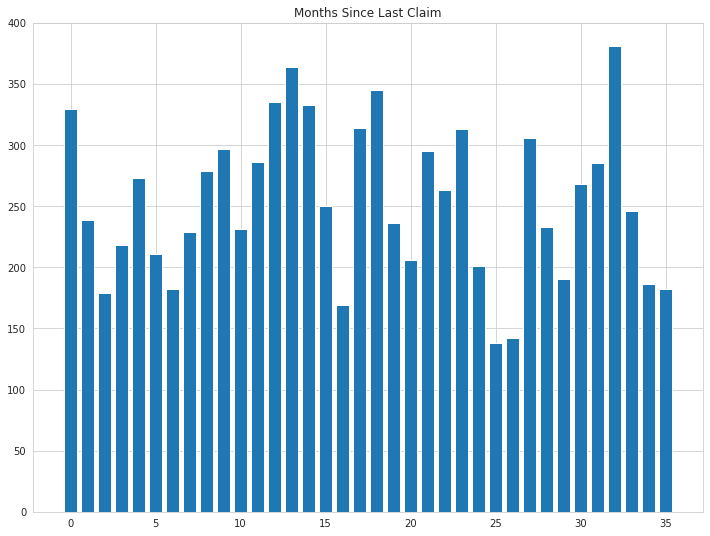

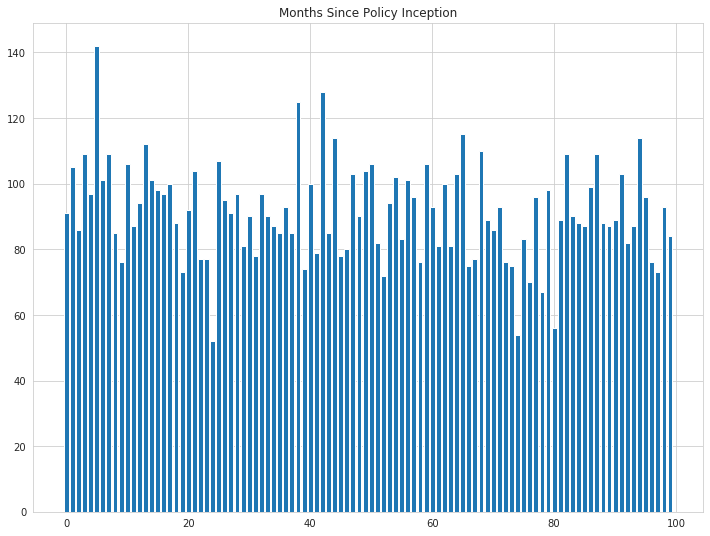

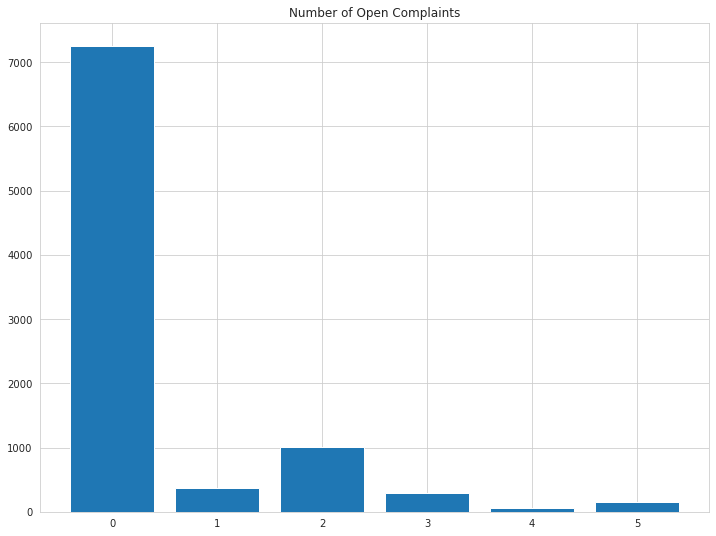

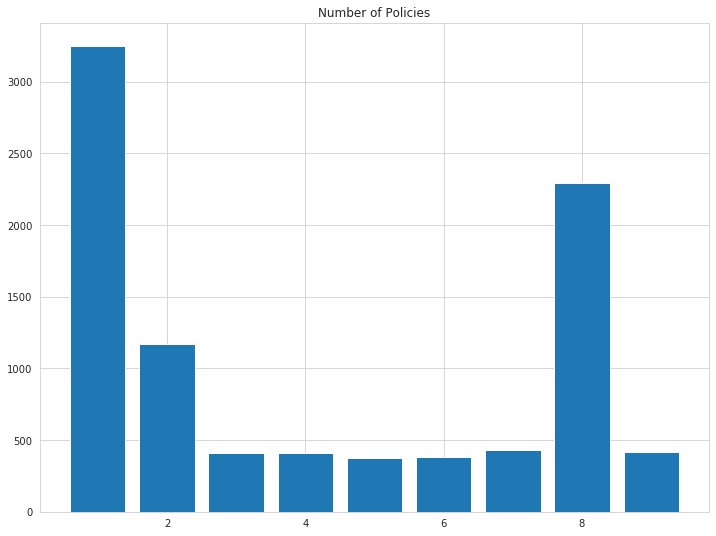

In [32]:
# Using matplotlib library
for col in discrete_df.columns:
    x = data[col].unique()
    y = data[col].value_counts()
    fig, ax = plt.subplots(figsize = (12, 9))
    plt.title(col)
    plt.bar(x, y)
    plt.show()

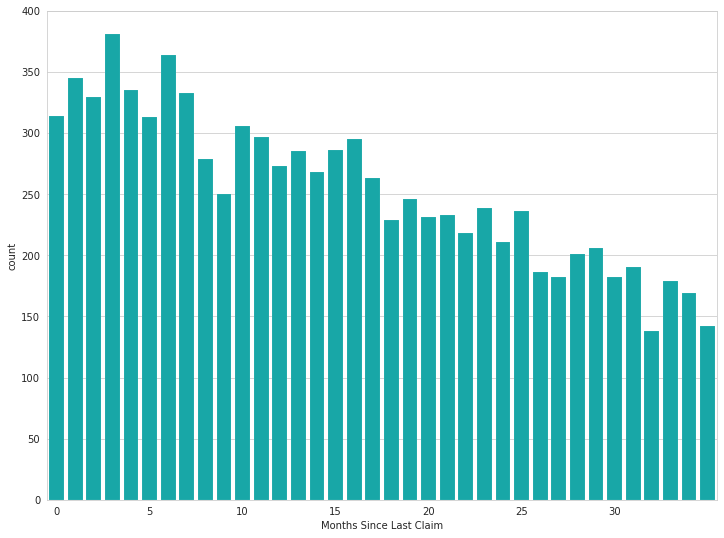

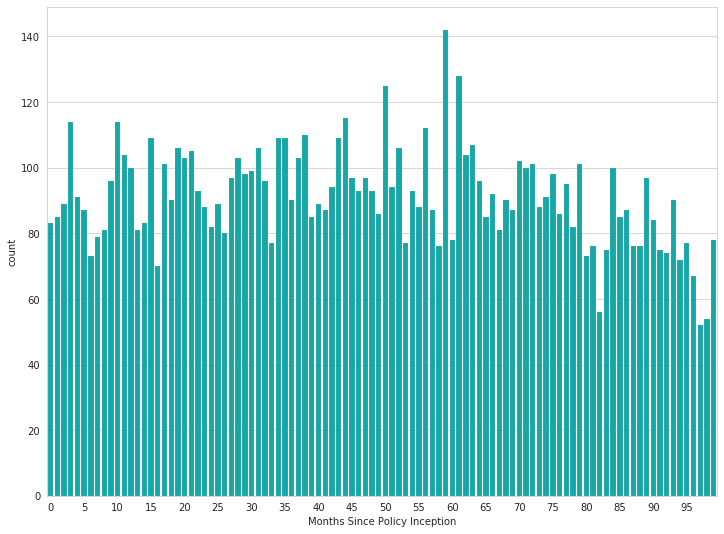

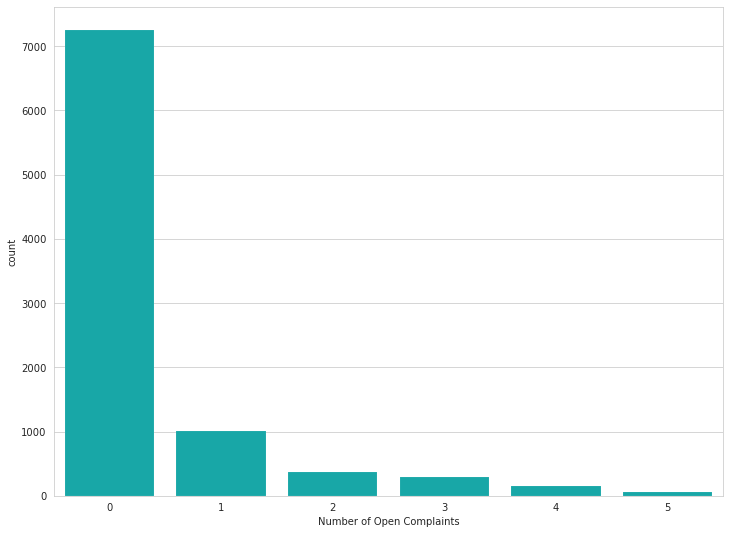

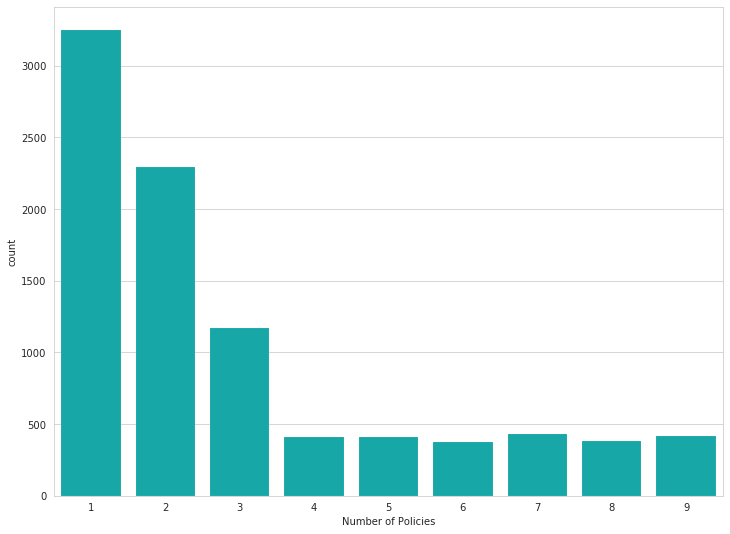

In [74]:
# Using seaborn & matplotlib library
for col in discrete_df.columns:
    fig, ax = plt.subplots(figsize=(12, 9))
    x_min = min(data[col])
    x_max = max(data[col])
    count = len(data[col].unique())
    sns.countplot(x=col, data=discrete_df, color='c', linewidth=0.1, ax=ax)
    if count > 10:
        x_ticks = [x for x in range(x_min, x_max, 5)]
        plt.xticks(ticks=x_ticks, labels=x_ticks)   
    plt.show()

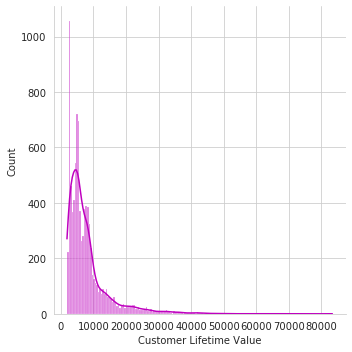

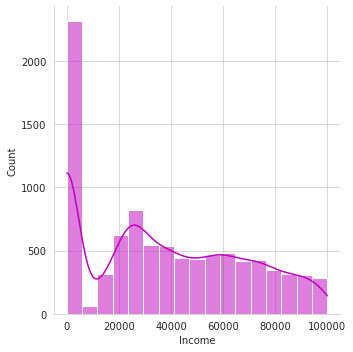

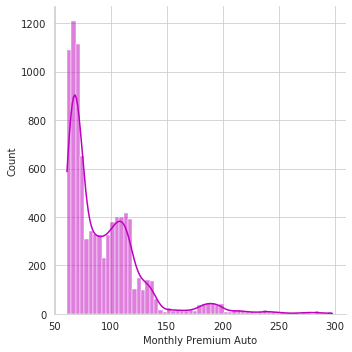

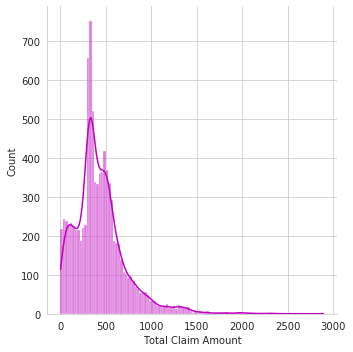

In [89]:
# Using seaborn library
for col in continuous_df.columns:
    sns.displot(data=continuous_df, x=col, color='m', kde=True)
    plt.show()

#### 5. What can you see in the plots?

**Discrete data trends:**
* The number of policies and number of open complaints have a log distribution => there are few people that own more than one policy & have more than one active complaint
- The months since last claim decrease linearly => there number of claims have been increasing recently
* The months since policy inception are almost uniformly distributed => there is a relatively constant influx of clients

**Continuous data trends:**
* None of the columns have a typical normal distribution
- Many customers have no income (or no income recorded), lower-range policies, but most claims are in the mid-range

#### 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

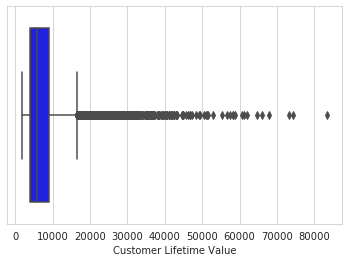

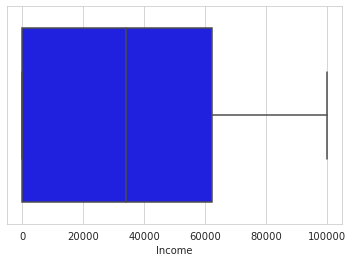

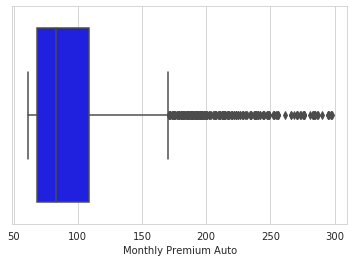

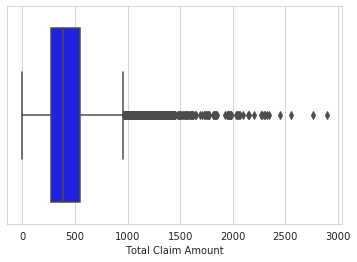

In [101]:
for col in continuous_df.columns:
    sns.boxplot(data=continuous_df, x=col, color='b')
    plt.show()

#### 7. Have you found outliers? If you have, what should we do with them?

All columns except income have many outliers, so we need to remove them from the dataset:

In [116]:
def remove_outliers(df, threshold=1.5):
    continuous_df, _ = split_numericals(df)
    for column in continuous_df.columns:
        upper = np.percentile(df[column], 75)
        lower = np.percentile(df[column], 25)
        iqr = upper - lower
        upper_limit = upper + threshold * iqr
        lower_limit = lower - threshold * iqr
        df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]
    return df

In [117]:
print(data.shape)

(9134, 24)


In [119]:
data = remove_outliers(data)
print(data.shape)

(7789, 24)


The rows with outliers represented 14.7% of our data in total.